In [16]:
import random
import math
from matplotlib import pyplot as plt

In [9]:
class Car:
    def __init__(self, velocity, position):
        self.__velocity = velocity
        self.__position = position
    
    def setVelocity(self, velocity):
        self.__velocity = velocity
    
    def getVelocity(self):
        return self.__velocity
    
    def setPosition(self, position):
        self.__position = position
        
    def getPosition(self):
        return self.__position
    
    def __str__(self):
        return "Car(velocity=" + str(self.getVelocity()) +", position=" + str(self.getPosition()) + ")"

In [47]:
class Track:
    maximumVelocity = 5;
    def __init__(self, density = 0.5, probability = 0.3):
        self.__density = density
        self.__probability = probability
        self.__cars = self.initializeCars()
        
    def getCars(self):
        return self.__cars
    
    def getProbability(self):
        return self.__probability
    
        
    def initializeCars(self):
        numberOfCars = math.floor(self.__density * 100)
        cars = []
        for i in range(numberOfCars):
            # Set the position to a random int first
            # There are 100 cells from 0 to 99
            car = Car(random.randint(0,5), random.randint(0, 99))
            
            # Check if the car's position is not already occupied
            # Else change it to a random value
            while True:
                exists = False
                for j in range(len(cars)):
                    if(cars[j].getPosition() == car.getPosition()):
                        exists = True
                        
                if exists:
                    car.setPosition(random.randint(0, 99))
                else: break
                    
            cars.append(car)
            
        cars.sort(key = lambda car: car.getPosition())
        return cars
    
    def performModelActions(self):
        self.accelerateCars()
        self.slowDownCars()
#         self.randomizeVelocity()
        self.moveCars()
    
    def accelerateCars(self):
        cars = self.getCars()
        for car in cars:
            if car.getVelocity() < self.maximumVelocity:
                car.setVelocity(car.getVelocity() + 1)
                
    def slowDownCars(self):
        cars = self.getCars()
        numberOfCars = len(cars)
        for index, car in enumerate(cars):
            distanceToNextCar = abs(car.getPosition() - cars[(index + 1)% numberOfCars].getPosition())
            if distanceToNextCar < car.getVelocity():
                car.setVelocity(distanceToNextCar - 1)
                
    def randomizeVelocity(self):
        cars = self.getCars()
        probabilityInPercentage = self.getProbability() * 100
        for car in cars:
            if car.getVelocity() >= 1 and random.randint(1, 100) <= probabilityInPercentage:
                car.setVelocity(car.getVelocity() - 1)
                
    def moveCars(self):
        cars = self.getCars()
        for car in cars:
            car.setPosition(car.getPosition() + car.getVelocity())
            # Reset car into circle
            car.setPosition(car.getPosition() % 99)
            
    def getAverageCarVelocity(self):
        cars = self.getCars()
        totalVelocity = 0
        for car in cars:
            totalVelocity += car.getVelocity()
            
        return totalVelocity / len(cars)

In [58]:
track = Track(0.8)
[str(car) for car in track.getCars()]

['Car(velocity=5, position=0)',
 'Car(velocity=5, position=2)',
 'Car(velocity=4, position=4)',
 'Car(velocity=3, position=5)',
 'Car(velocity=1, position=7)',
 'Car(velocity=5, position=8)',
 'Car(velocity=1, position=10)',
 'Car(velocity=5, position=11)',
 'Car(velocity=1, position=12)',
 'Car(velocity=5, position=13)',
 'Car(velocity=5, position=14)',
 'Car(velocity=4, position=16)',
 'Car(velocity=3, position=17)',
 'Car(velocity=4, position=18)',
 'Car(velocity=1, position=19)',
 'Car(velocity=0, position=20)',
 'Car(velocity=3, position=22)',
 'Car(velocity=3, position=23)',
 'Car(velocity=5, position=24)',
 'Car(velocity=4, position=25)',
 'Car(velocity=2, position=26)',
 'Car(velocity=5, position=27)',
 'Car(velocity=2, position=28)',
 'Car(velocity=1, position=30)',
 'Car(velocity=0, position=31)',
 'Car(velocity=4, position=32)',
 'Car(velocity=2, position=33)',
 'Car(velocity=3, position=34)',
 'Car(velocity=2, position=35)',
 'Car(velocity=1, position=36)',
 'Car(velocity=0

In [76]:
track.performModelActions()
# [str(car) for car in track.getCars()]
track.getAverageCarVelocity()

1.4

In [36]:
def runModelAndGetAverageVelocity(track):
    for i in range(10000):
        track.performModelActions()
    return track.getAverageCarVelocity()

In [37]:
densities = [i / 10 for i in range(1,11)]
probabilities = [0.1, 0.2, 0.3, 0.6]
densities

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

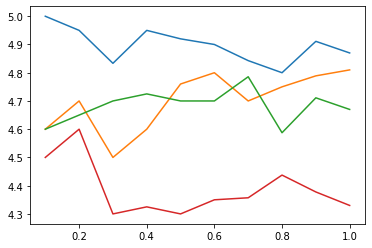

In [29]:
for p in probabilities:
    averageVelocities = []
    for d in densities:
        track = Track(d, p)
        averageVelocities.append(runModelAndGetAverageVelocity(track))
        
    plt.plot(densities, averageVelocities)
    
plt.show()

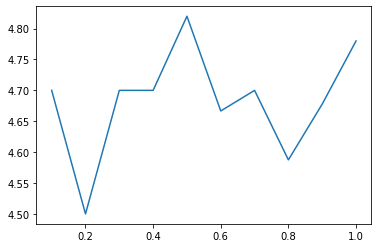

In [38]:
averageVelocities = []
for d in densities:
    track = Track(d, 0.3)
    averageVelocities.append(runModelAndGetAverageVelocity(track))
    
plt.plot(densities, averageVelocities)
plt.show()